In [ ]:
import numpy as np
import cv2
import sys

In [ ]:
cap = cv2.VideoCapture("/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/PETS2000.avi")

if not cap.isOpened():
    print('video open failed')
    
ret, back = cap.read() # 첫 화면을 배경으로 설정한다

if not ret:
    print('background image registration failed')
    sys.exit()
    
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY) #gray
back = cv2.GaussianBlur(back, (0,0), 1) #가우시안 블러 사용. 커널사이즈 (0,0) 시그마 1

# 비디오 매 프레임 처리
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(0,0), 1 )
    
    # 배경과 영상의 차 구하기 & 이진화
    diff = cv2.absdiff(gray, back) 
    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY) # 임계치가 넘으면 흰색으로 표기
    
    cv2.imshow('frame', frame)
    cv2.imshow('diff', diff)
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()    

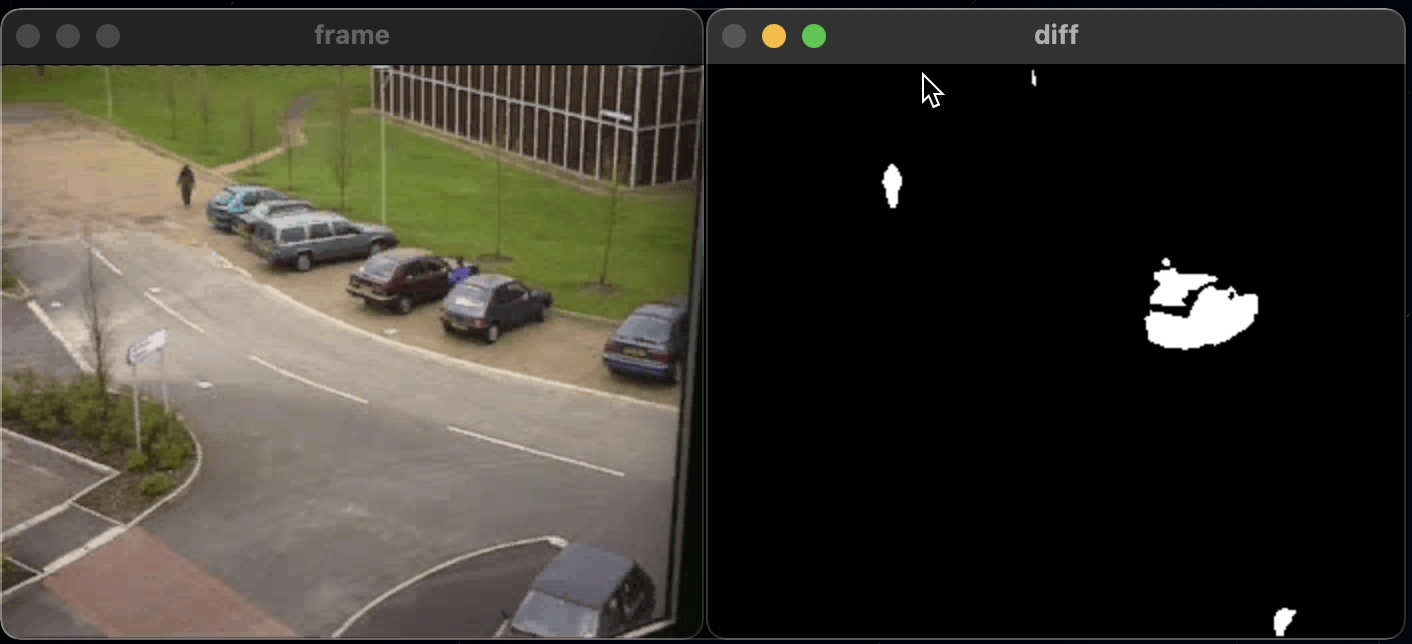